<a href="https://colab.research.google.com/github/aniket2405/TMAPaperCode/blob/main/Atlas_Trends_API_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atlas Trends API demonstration

The RIPE Atlas Trends API allows one to find patterns (*clusters*) in RIPE Atlas RTT measurements, in a way similar to what a human expert would do. The clustering is done using a nonparametric Bayesian model, the Hierarchical Dirichlet Process Hidden Markov Model (HDP-HMM).

1. [Minimal Example](#Minimal-Example)
1. [Examples](#Examples)
1. [API Endpoints](#API-Endpoints)

Notebook cells can be run by pressing <kbd>MAJ</kbd>+<kbd>Enter</kbd>.

In [ ]:
# Import the `trends` module that contains the API client and various utilities.
try:
    import google.colab, sys
    !git clone https://github.com/maxmouchet/atlas-trends-demo.git
    sys.path.append('atlas-trends-demo')
except:
    import sys; sys.path.append('..')

Cloning into 'atlas-trends-demo'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 52 (delta 3), reused 0 (delta 0), pack-reused 43
Unpacking objects: 100% (52/52), done.


In [ ]:
from trends import *

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
set_mpl_style(font_size=12)

## Minimal Example

In this section we show the minimal code necessary to fetch a time series from the API and to display the segmentation.

In [ ]:
client = AtlasTrendsClient(verbose=True) # The `verbose` flag enables query time reporting.

In [ ]:
# This script has to run for each pair of (measurement id, probe id) as provided in the excel sheet. 
# The below implementation is just to demonstarte one pair of value and how the changepoint detection of the pair is carried out using the trends API.

df = client.fetch_trends(
    msm_id   = 1423187,                   # Atlas measurement ID
    prb_id   = 6030,                      # Atlas probe ID
    start_dt = utc_datetime(2020, 1, 1),  # (Optional) Default: stop date - 7 days
    stop_dt  = utc_datetime(2020, 1, 15), # (Optional) Default: the current date
    as_df    = True                       # (Optional) Returns a Pandas DataFrame instead of a JSON object
)

Estimated query time: 12.2s
Actual query time: 15.8s


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving probes_data.csv to probes_data.csv


In [ ]:
import io
import pandas as pd
probeid_data = pd.read_csv(io.BytesIO(uploaded['probes_data.csv']))

In [ ]:
probeid_data.head(3)

,probeid,fqdn,v4measid,v6measid
0,6030,rs-beg-as13004.anchors.atlas.ripe.net,1402085,1402087
1,6039,hu-bud-as12303.anchors.atlas.ripe.net,1423187,1423189
2,6041,is-rey-as25509.anchors.atlas.ripe.net,1425315,1425317


In [ ]:
import numpy as np

In [ ]:
probes = []
measurements = []

for index, row in probeid_data.iterrows():
  probes.append(row["probeid"])
  measurements.append(row["v4measid"])

print(len(probes))
print(len(measurements))  

124
124


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(16,16))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

Estimated query time: 12.2s
Actual query time: 12.2s
Estimated query time: 12.2s
Actual query time: 11.3s
Estimated query time: 12.2s
Actual query time: 11.3s
Estimated query time: 12.2s
Actual query time: 11.8s


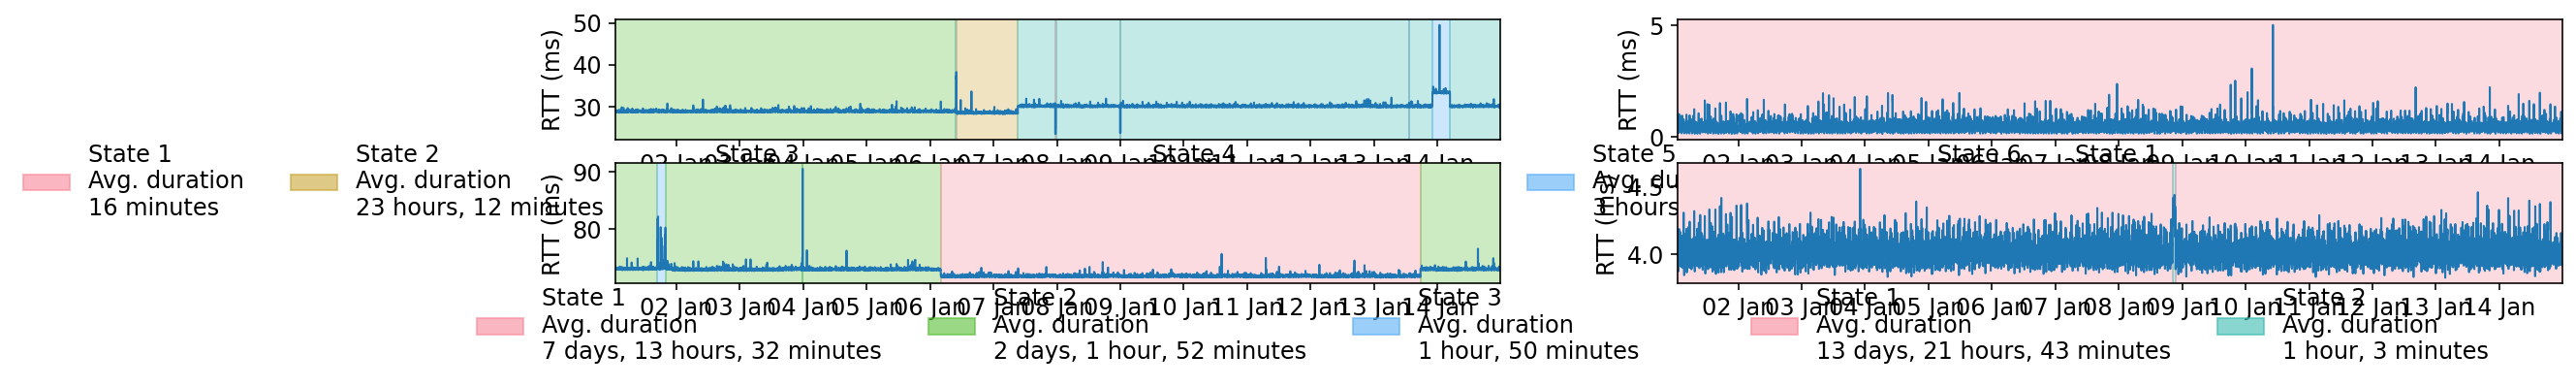

In [ ]:
for i in range(4):

    df = client.fetch_trends(
      msm_id   = 1423187,                   # Atlas measurement ID
      prb_id   = probes[i],                 # Atlas probe ID
      start_dt = utc_datetime(2020, 1, 1),  # (Optional) Default: stop date - 7 days
      stop_dt  = utc_datetime(2020, 1, 15), # (Optional) Default: the current date
      as_df    = True                       # (Optional) Returns a Pandas DataFrame instead of a JSON object
    )
    plt.subplot(2,2,i+1)
    plot_trends(df)

    

In [ ]:
res = client.fetch_summary(
   msm_id   = 1423187,                   # Atlas measurement ID
      prb_id   = probes[i],                 # Atlas probe ID
      start_dt = utc_datetime(2020, 1, 1),  # (Optional) Default: stop date - 7 days
      stop_dt  = utc_datetime(2020, 1, 15), # (Optional) Default: the current date
      as_df   = True                       # (Optional) Returns a Pandas DataFrame instead of a JSON object
)

Estimated query time: 12.2s
Actual query time: 12.6s


In [ ]:
res['segments']

[{'state': 3,
  'start': 0,
  'stop': 16,
  'startTime': 1577836681,
  'stopTime': 1577840436},
 {'state': 1,
  'start': 16,
  'stop': 2827,
  'startTime': 1577840436,
  'stopTime': 1578515082},
 {'state': 2,
  'start': 2827,
  'stop': 2843,
  'startTime': 1578515082,
  'stopTime': 1578518914},
 {'state': 1,
  'start': 2843,
  'stop': 5038,
  'startTime': 1578518914,
  'stopTime': 1579045712}]

In [ ]:
res = client.fetch_tre(
   msm_id   = 1423187,                   # Atlas measurement ID
      prb_id   = probes[i],                 # Atlas probe ID
      start_dt = utc_datetime(2020, 1, 1),  # (Optional) Default: stop date - 7 days
      stop_dt  = utc_datetime(2020, 1, 15), # (Optional) Default: the current date
      as_df   = True                       # (Optional) Returns a Pandas DataFrame instead of a JSON object
)

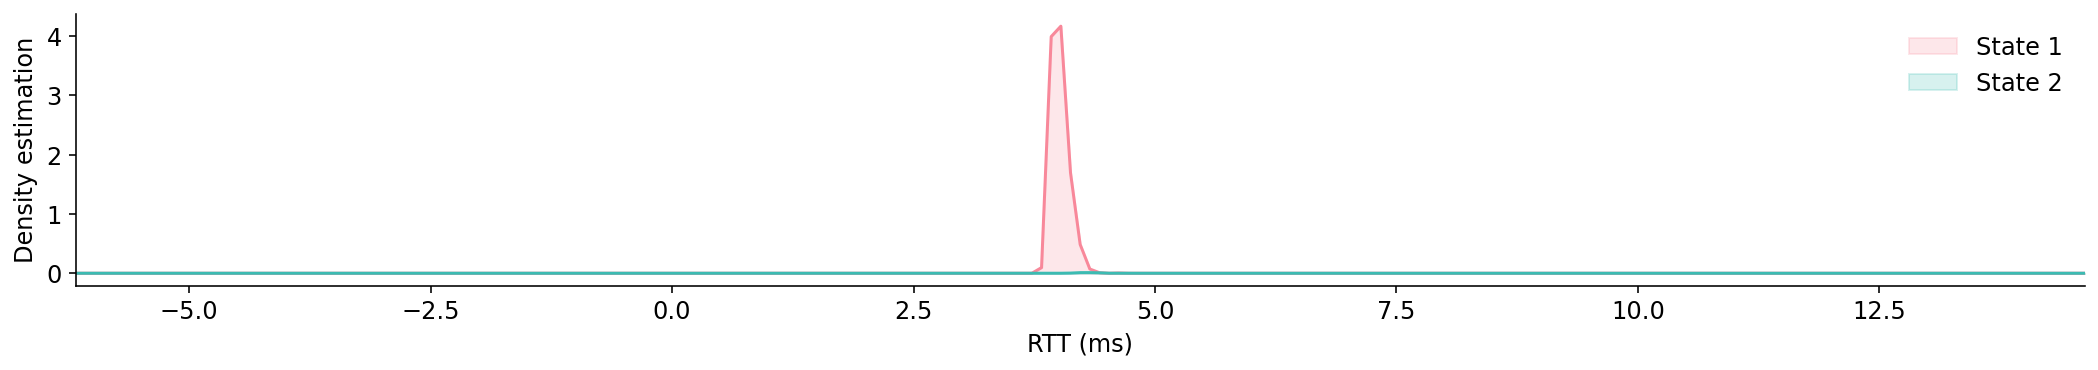

In [ ]:
plot_kde(df)

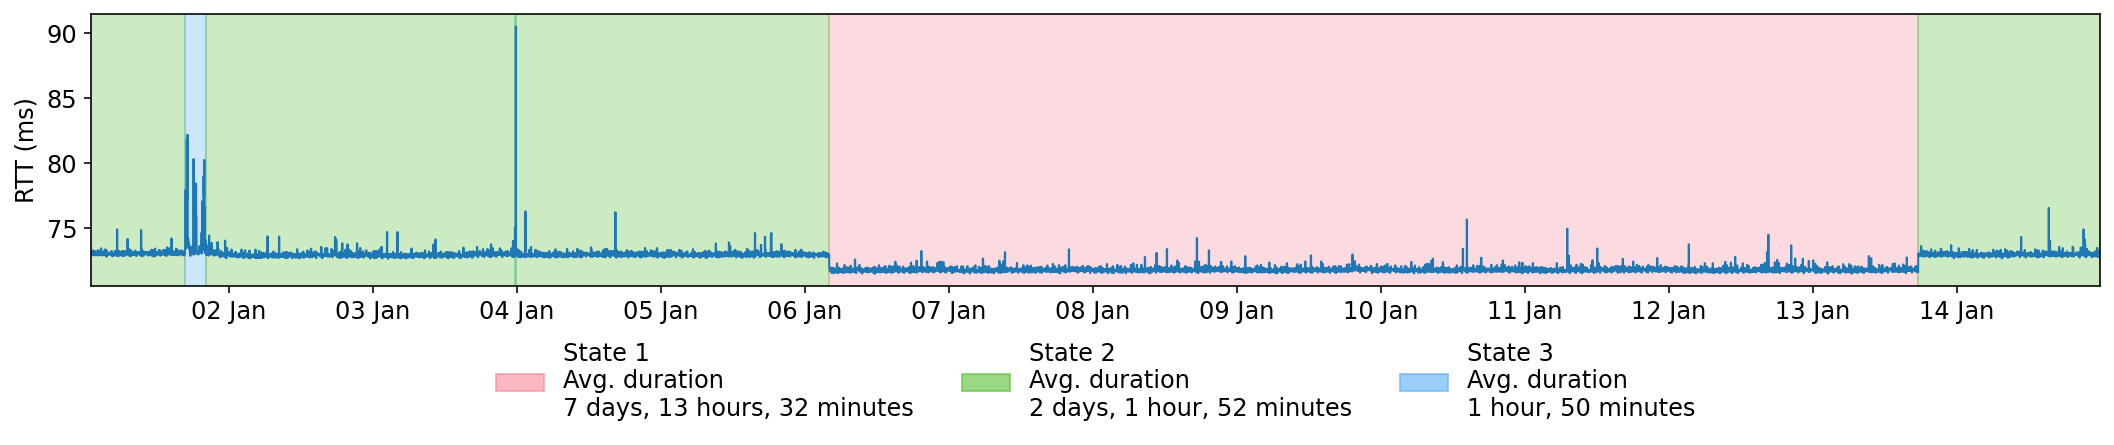

## Examples

### Persistent Congestion

Estimated query time: 12.2s
Actual query time: 11.1s


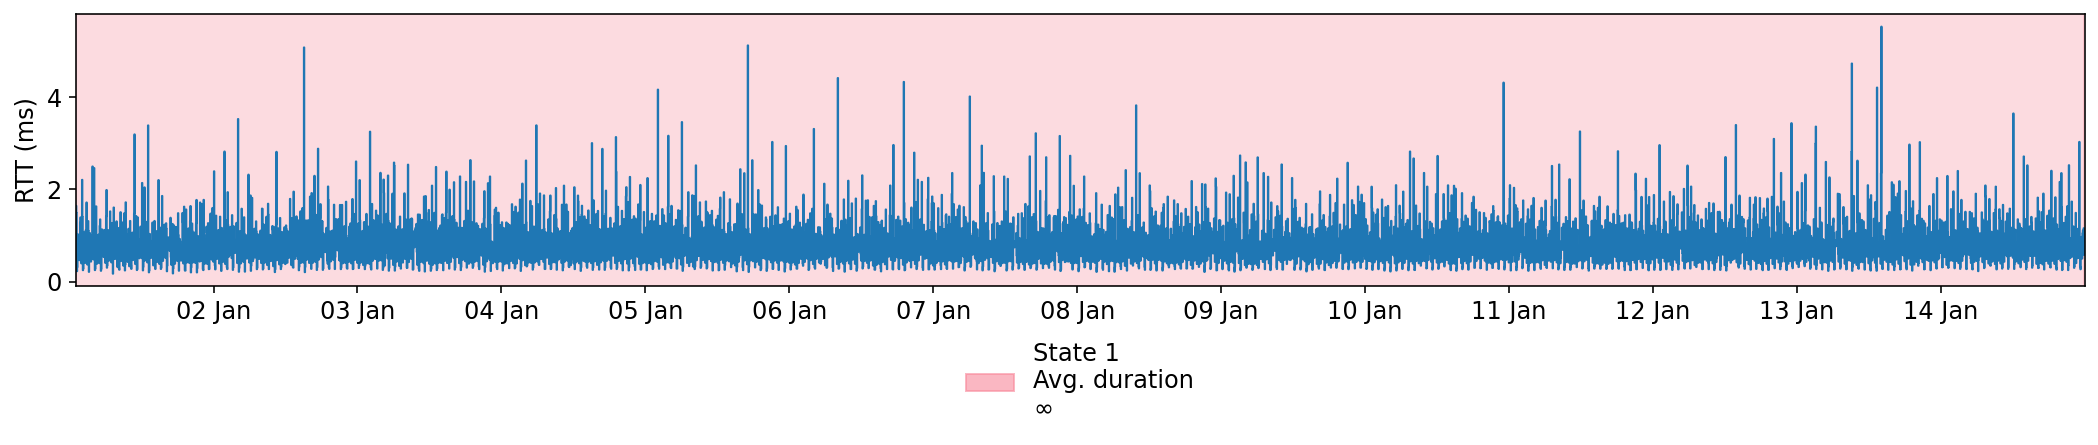

In [ ]:
df = client.fetch_trends(1423187, 6030, start_dt=utc_datetime(2020,1,1), stop_dt=utc_datetime(2020,1,15), as_df=True)
plot_trends(df)

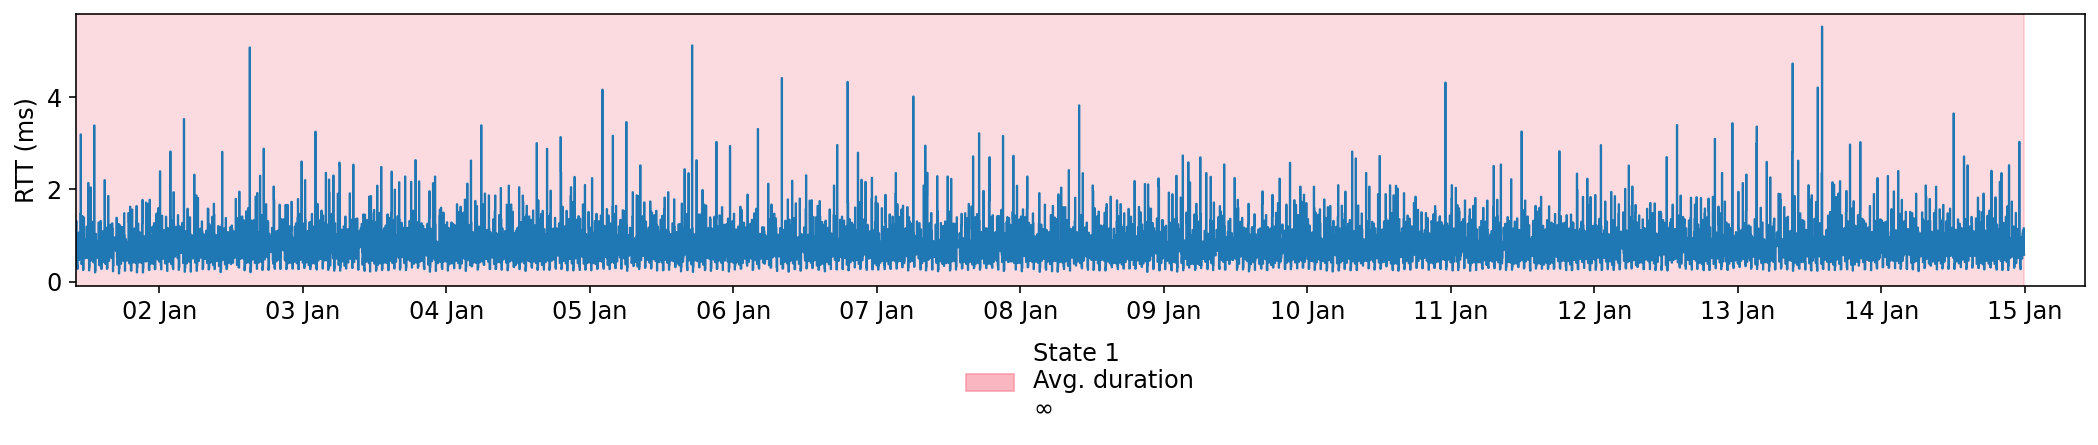

In [ ]:
plot_trends(df)
plt.xlim(utc_datetime(2020, 1, 1, 10), utc_datetime(2020, 1, 15, 10));

In this example some link on the path seems to experience periodic congestion in the evening.  
*(Ticks on the x-axis corresponds to midnight UTC time).*

The green state which lasts for 40 minutes on average seems to correspond to a state where the traffic level is high but the link is not saturated.  
The pink state which lasts for 2h45 on average seems to correspond to a saturated link.  

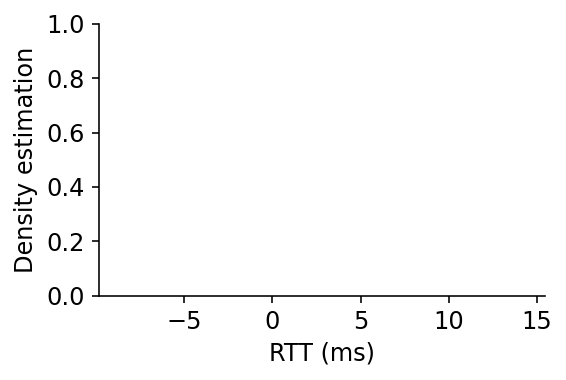

In [ ]:
plt.figure(figsize=(4, 2.5))
plot_kde(df, states=[3, 6])
plt.legend(['pre-congestion state', 'congestion state']);

## API Endpoints

The API base URL is https://trends.atlas.ripe.net/api/v1/.

The API offers 3 endpoints:

Method | Path | Parameters | Description | Example
:------|:-----|:-----------|:------------|:-------
GET | **`/trends/:msm_id/:prb_id`** | `start`, `stop` | Segment a time series and returns the RTT and its associated state | [/trends/1437285/6222?start=1525212000&stop=1525298400](https://trends.atlas.ripe.net/api/v1/trends/1437285/6222?start=1525212000&stop=1525298400)
GET | **`/trends/:msm_id/:prb_id/summary`** | `start`, `stop` | Segment a time series and return the segments | [/trends/1437285/6222/summary?start=1525212000&stop=1525298400](https://trends.atlas.ripe.net/api/v1/trends/1437285/6222/summary?start=1525212000&stop=1525298400)
GET | **`/ticks/:msm_id/:prb_id`** | `start`, `stop` | Output the ticks (with deduplication, ...) | [/ticks/1437285/6222?start=1525212000&stop=1525298400](https://trends.atlas.ripe.net/api/v1/ticks/1437285/6222?start=1525212000&stop=1525298400)

- Start and stop date are UTC time and can be specified as a Unix timestamp or as `YYYY-MM-DDTHH:MM` where `THH:MM` is optional (default to start of day).
- It will not work for durations longer than a month, or shorter than a 100 ticks (runs of the measurements, so for a measurement that runs every 4 minutes (the default) this will amount to at least 400 minutes).
- Segmentation takes a time linear with the number of observations.

In [ ]:
client = AtlasTrendsClient()

In [ ]:
query = {
    'msm_id':   1437285,
    'prb_id':   6222,
    'start_dt': utc_datetime(2018, 5, 2),
    'stop_dt':  utc_datetime(2018, 5, 2, 12)
}

**`Ticks` endpoint**

The `/ticks` endpoint returns the minimum RTT for a given pair with a constant time interval (duplicated results due to probes connectivity problems are suppressed, and missing results are explicitly inserted).

In [ ]:
res = client.fetch_ticks(**query)
schema = res['metadata']['schema']
print(schema)

['timestamp', 'tick', 'minRtt', 'status', 'statusMsg', 'drift', 'outOfBand']


In [ ]:
for (i, result) in enumerate(res['results'][:2]):
    print('\nResult #{}'.format(i))
    for (key, value) in zip(schema, result):
        print('- {} = {}'.format(key, value))


Result #0
- timestamp = 1525219275
- tick = 553860
- minRtt = None
- status = 2
- statusMsg = missingGap
- drift = 0
- outOfBand = False

Result #1
- timestamp = 1525219515
- tick = 553861
- minRtt = None
- status = 2
- statusMsg = missingGap
- drift = 0
- outOfBand = False


**`Trends` endpoint**

The `/trends` endpoint returns the minimum RTT and the associated segmentation.

In [ ]:
res = client.fetch_trends(**query)
schema = res['metadata']['schema']
print(schema)

In [ ]:
for (i, result) in enumerate(res['results'][:2]):
    print('\nResult #{}'.format(i))
    for (key, value) in zip(schema, result):
        print('- {} = {}'.format(key, value))

**`Summary` endpoint**

A summary of the time series can also be requested by appending `/summary` to the path.

In [ ]:
res = client.fetch_summary(**query)

In [ ]:
res['states']

In [ ]:
res['segments']

### DataFrame conversion

*Ticks* and *trends* results can be easily converted to a [Pandas](https://pandas.pydata.org/) DataFrame, either by using the `to_dataframe` method, or by using the `as_df` parameter.

In [ ]:
res = client.fetch_trends(**query)
to_dataframe(res).head(2)

In [ ]:
client.fetch_trends(**query, as_df=True).head(2)